# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('spam.csv')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...,NaN,NaN,NaN
3218,ham,Me too baby! I promise to treat you well! I be...,NaN,NaN,NaN
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...,NaN,NaN,NaN
2482,ham,Pansy! You've been living in a jungle for two ...,NaN,NaN,NaN
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 columns

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
df.sample(5)

,v1,v2
1353,ham,"Goodnight, sleep well da please take care pa. ..."
198,ham,Hi its Kate how is your evening? I hope i can ...
1249,ham,"I call you later, don't have network. If urgnt..."
300,ham,"Awesome, I remember the last time we got someb..."
4568,ham,At WHAT TIME should i come tomorrow


In [11]:
#renaming columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3578,ham,Multiply the numbers independently and count d...
1707,ham,Was doing my test earlier. I appreciate you. W...
2230,ham,Hey... Thk we juz go accordin to wat we discus...
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit..."
3817,spam,74355 XMAS iscoming & ur awarded either å£500 ...


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#duplicate value
df.duplicated().sum()

403

In [20]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

In [23]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## EDA

In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

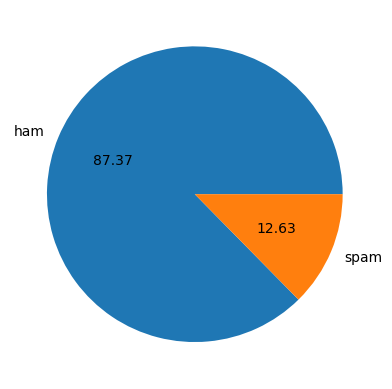

In [28]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [29]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [35]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [36]:
df['num_characters']=df['text'].apply(len)

In [37]:
df.sample(5)

,target,text,num_characters
4398,0,Yes just finished watching days of our lives. ...,56
2940,0,My supervisor find 4 me one lor i thk his stud...,95
589,0,"I'm in a meeting, call me later at",34
226,1,Will u meet ur dream partner soon? Is ur caree...,137
1393,0,Oh ok..,7
